# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('C:/Users/Nandini/OneDrive/Desktop/NLP Assignments/pickle/corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

# Polarity: Polarity measures the degree of positive or negative sentiment in a piece of text. It is a float value between -1.0 (most negative) and 1.0 (most positive). A polarity score of 0.0 indicates a neutral sentiment.

# Subjectivity: Subjectivity measures the degree to which the text expresses a personal opinion, feeling, or emotion, as opposed to a factual statement. It is a float value between 0.0 (most objective) and 1.0 (most subjective).

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.055237,0.558976
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002690,0.513958
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.056665,0.515796


In [3]:
data.index

Index(['ali', 'anthony', 'bill', 'bo', 'dave', 'hasan', 'jim', 'joe', 'john',
       'louis', 'mike', 'ricky'],
      dtype='object')

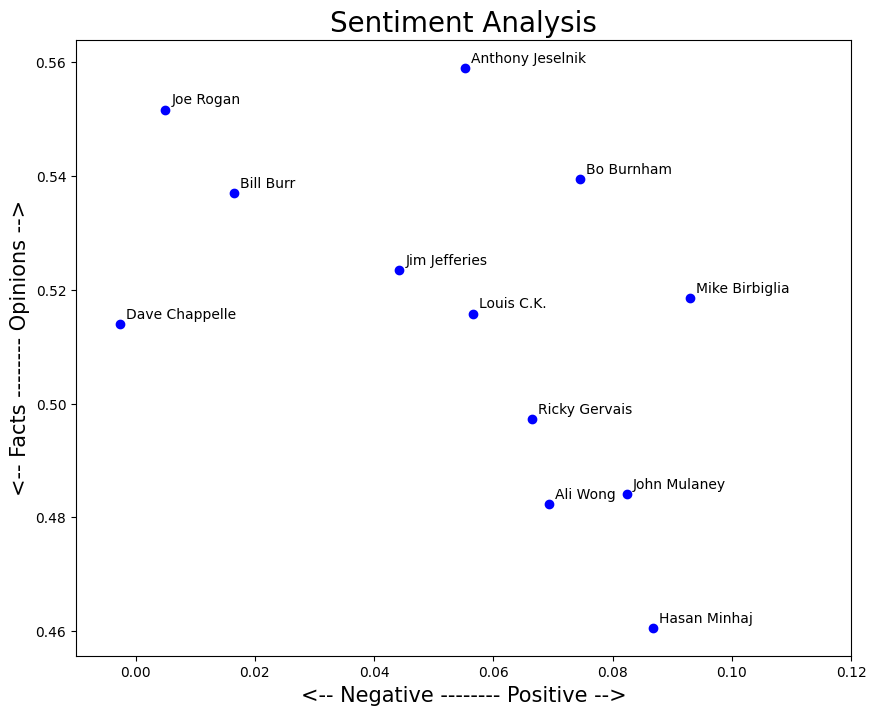

In [4]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [5]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.055237,0.558976
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002690,0.513958
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.056665,0.515796


In [7]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go t

In [8]:
# The list has 12 elements, one for each transcript
len(list_pieces)

12

In [9]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [10]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.11168482647296207,
  0.056407029478458055,
  0.09445691155249979,
  0.09236886724386723,
  -0.014671592775041055,
  0.09538361348808912,
  0.06079713127248339,
  0.08721655328798185,
  0.030089690638160044,
  0.07351994851994852],
 [0.13933883477633482,
  -0.06333451704545455,
  -0.056153799903799935,
  0.014602659245516405,
  0.16377334420812684,
  0.09091338259441709,
  0.09420031055900621,
  0.11566683919944787,
  -0.04238582919138478,
  0.058467487373737366],
 [-0.0326152022580594,
  0.006825656825656827,
  0.023452001215159095,
  0.01934081890331888,
  -0.026312183887941466,
  0.06207506613756614,
  0.030250682288725742,
  -0.020351594027441484,
  -0.01150485008818343,
  0.10757491470108295],
 [0.17481829573934843,
  -0.04116923483102918,
  -0.022686011904761886,
  0.019912549136687042,
  0.0592493946731235,
  0.05700242218099361,
  0.04407051282051284,
  0.11019892033865757,
  0.19319944575626394,
  0.23029900332225917],
 [-0.05093449586407334,
  -0.05557354333778966,
  0.035

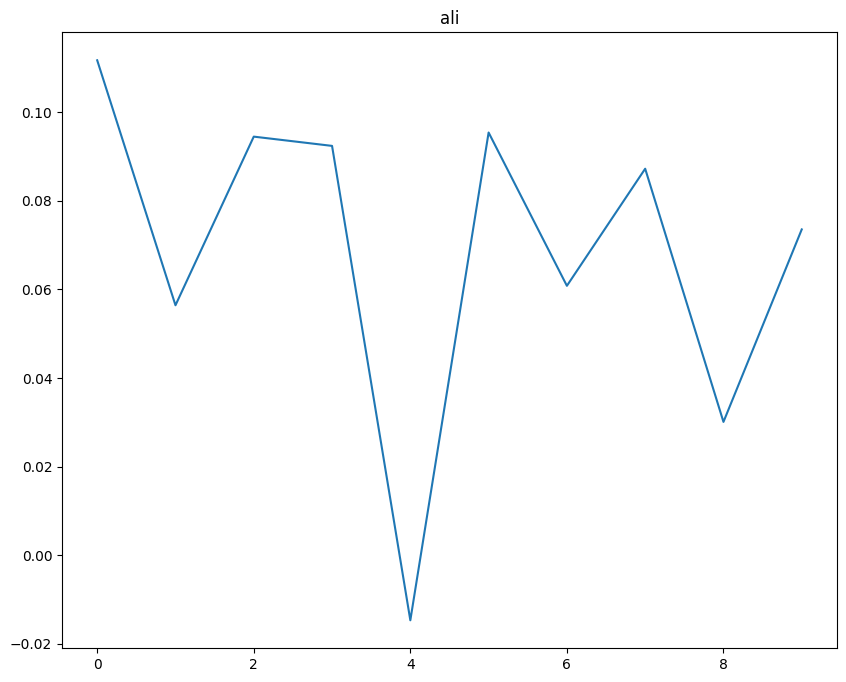

In [11]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

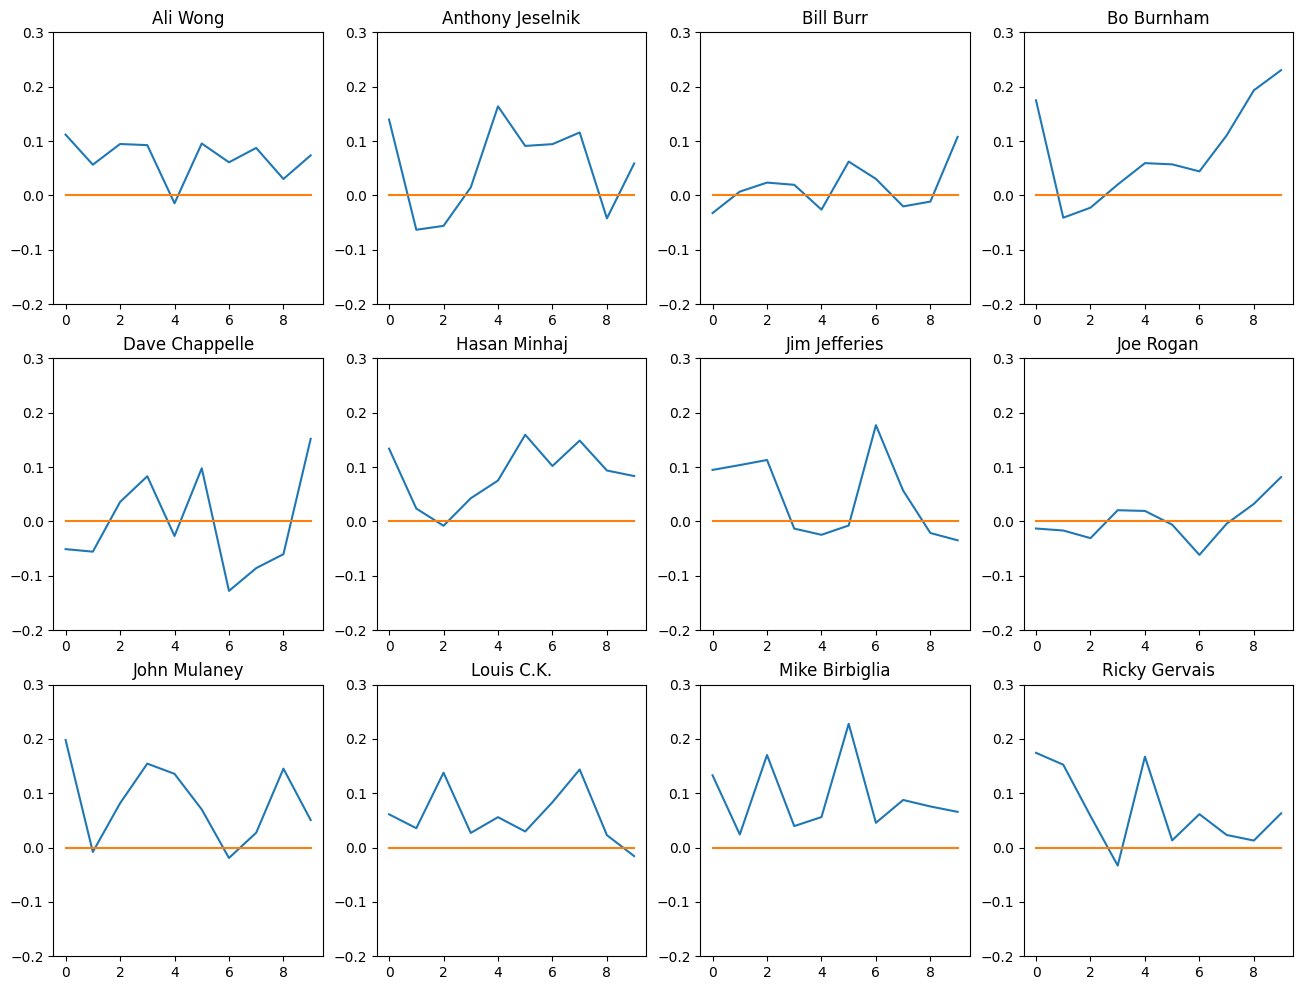

In [12]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [13]:
# import pandas as pd
# from textblob import TextBlob
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.feature_extraction.text import CountVectorizer

# # Sample data with comedians and their jokes
# data = {'comedian': ['Amy Schumer', 'Dave Chappelle', 'Ellen DeGeneres', 'Kevin Hart', 'Trevor Noah'],
#         'jokes': ["I'm the girl you wish you hadn't started a conversation with at a party.",
#                   "You know who’s not going to give you coronavirus? Black people, because we can’t catch it.",
#                   "I'm a godmother. That's a great thing to be, a godmother. She calls me 'god' for short. That's cute. I taught her that.",
#                   "I got robbed by a bunch of kids the other day. It was so bad, I didn't even want my shit back.",
#                   "I feel like I'm not from here. Like, I was sent here to observe and report back."]}
# df = pd.DataFrame(data)

# # Perform sentiment analysis on each joke
# def get_sentiment(text):
#     blob = TextBlob(text)
#     polarity = blob.sentiment.polarity
#     subjectivity = blob.sentiment.subjectivity
#     return (polarity, subjectivity)

# df['sentiment'] = df['jokes'].apply(get_sentiment)

# # Perform topic modeling using LDA
# vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
# doc_term_matrix = vectorizer.fit_transform(df['jokes'].values.astype('U'))
# lda = LatentDirichletAllocation(n_components=3, random_state=0)
# lda.fit(doc_term_matrix)
# topics = lda.transform(doc_term_matrix)
# df['topics'] = topics.argmax(axis=1)

# # Print the results
# print(df)


In [14]:
polarity_average=[]
for p in polarity_transcript:
    average=sum(p)/len(p)
    polarity_average.append(average)
polarity_average


[0.0687252979179409,
 0.05150887118159474,
 0.015873530980988385,
 0.0824895297232055,
 -0.0038296740798851427,
 0.08552988016190446,
 0.04444021643368727,
 0.002199615852795417,
 0.08355586252577682,
 0.05813541650066214,
 0.09250889885187022,
 0.06928006681909515]

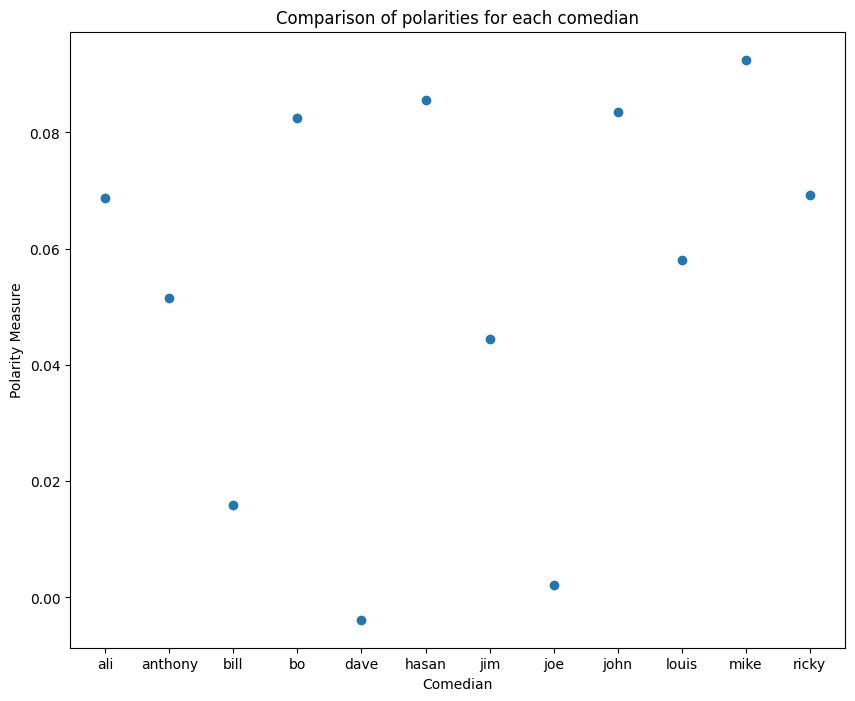

In [15]:
# fig,ax=plt.subplot()
plt.rcParams['figure.figsize'] = [10, 8]
plt.scatter(data.index,polarity_average)
plt.xlabel('Comedian')
plt.ylabel('Polarity Measure')
plt.title('Comparison of polarities for each comedian')
plt.show()

finding- Dave has the least polarity ie his opinions are mostly negative whereas Mike's opinions are mostly positive  indicating that he refers to all the factual statements and then makes a general opnion

In [16]:
#calculate subjectivity of each piece of text
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)
    
subjectivity_transcript

[[0.5742130750605327,
  0.4329195011337868,
  0.3756474938460233,
  0.49127128427128447,
  0.4455966064586755,
  0.5150857852129038,
  0.4975687458081823,
  0.5288513321995466,
  0.508007774538387,
  0.4836550836550836],
 [0.5667857142857141,
  0.6001299264971139,
  0.61996151996152,
  0.636940836940837,
  0.4561737980216241,
  0.5675082101806241,
  0.4586024844720497,
  0.6545190316929447,
  0.5321902891347337,
  0.4971196338383838],
 [0.6534959881388449,
  0.42468003718003716,
  0.5389010404799877,
  0.5885652958152955,
  0.5258335519699155,
  0.5328199404761906,
  0.5519151138716354,
  0.5296811945117029,
  0.4931190476190477,
  0.5480937546358106],
 [0.5753331244778614,
  0.651449692780338,
  0.5401930501930503,
  0.40871392496392467,
  0.5242345977939197,
  0.522715934858792,
  0.591147741147741,
  0.6037876668785761,
  0.5803150553150556,
  0.4982281284606866],
 [0.5224262240107311,
  0.46909695696460413,
  0.49236726874657905,
  0.5054730143045358,
  0.5005335692835695,
  0.5121

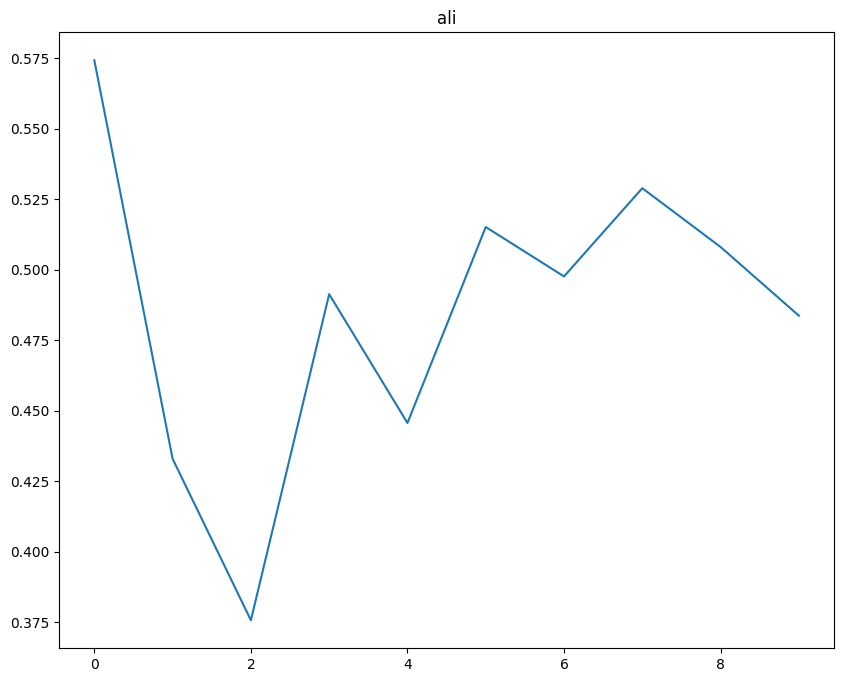

In [17]:
# Show the plot for one comedian
plt.plot(subjectivity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

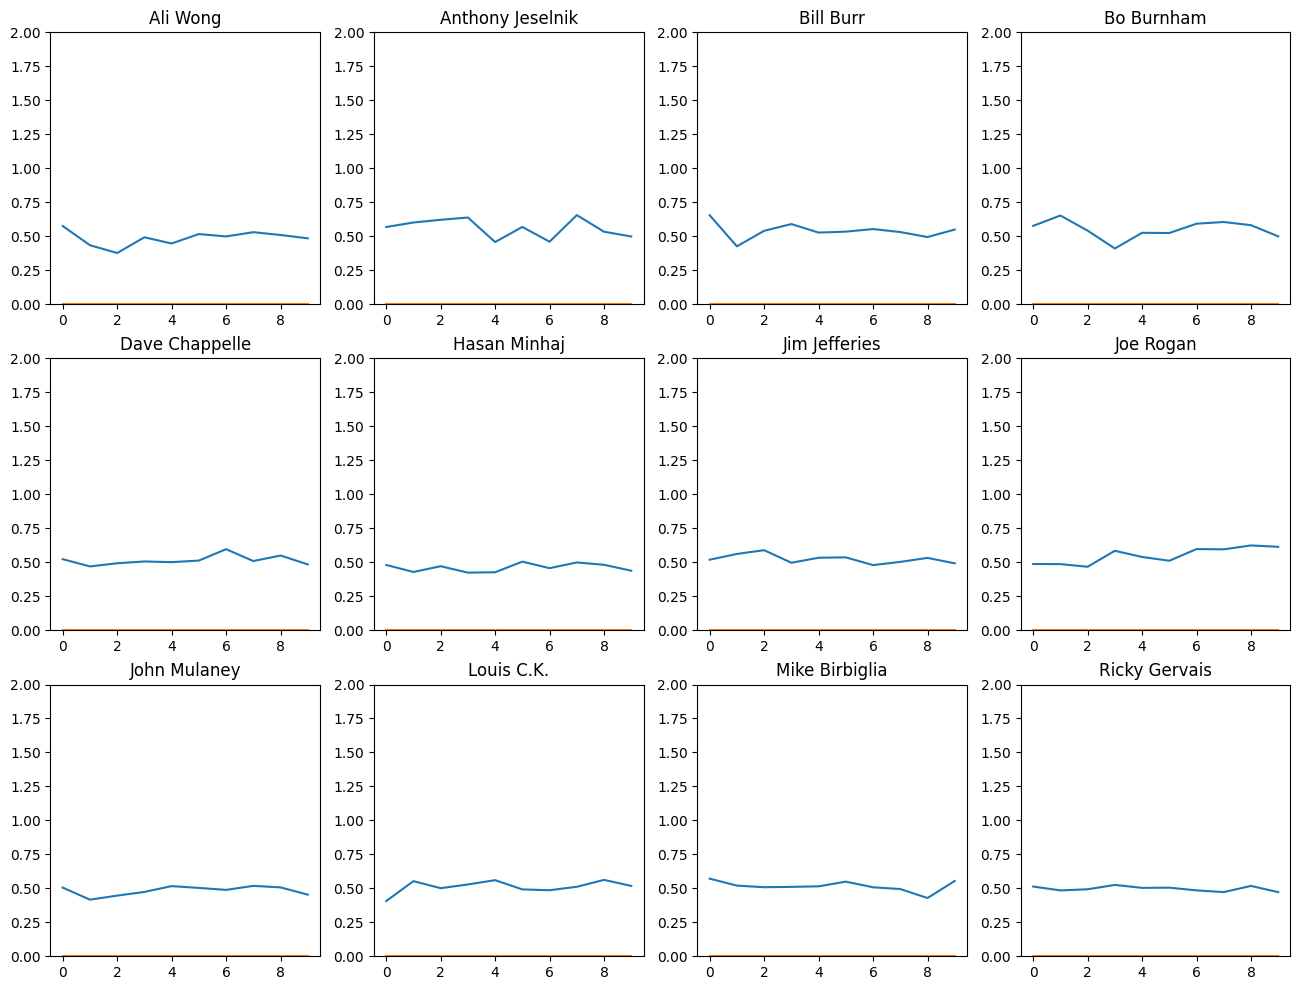

In [18]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=0, ymax=2)
    
plt.show()

In [19]:
subjectivity_average=[]
for p in subjectivity_transcript:
    average=sum(p)/len(p)
    subjectivity_average.append(average)
subjectivity_average

[0.48528166821844054,
 0.5589931445025546,
 0.5387104964698468,
 0.5496118916869945,
 0.5139945489721365,
 0.46058193566340444,
 0.5237438781243925,
 0.5501545074190728,
 0.48286445028540326,
 0.5118749604879989,
 0.5160004362286552,
 0.4971677878829396]

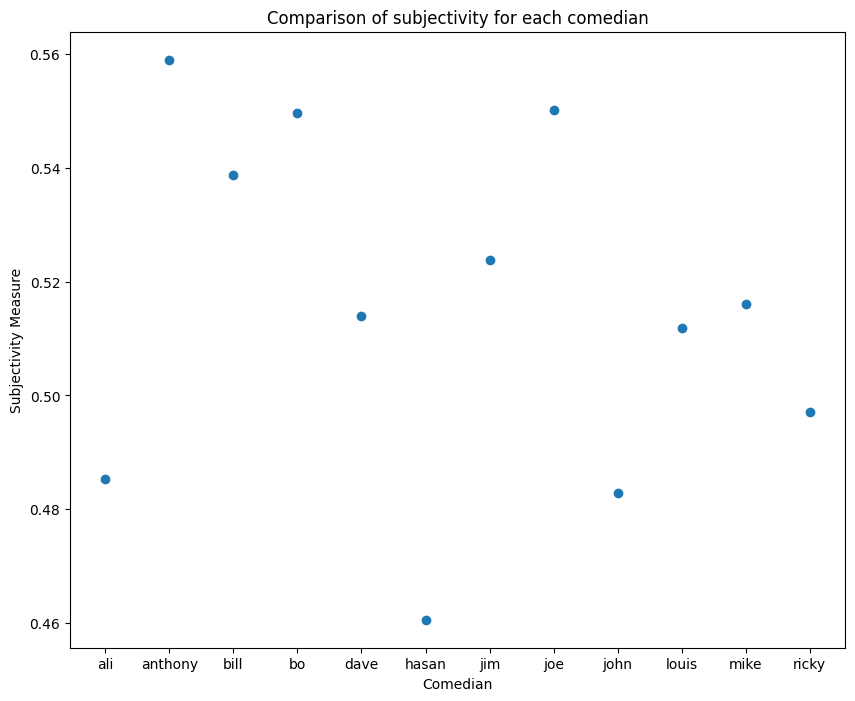

In [20]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.scatter(data.index,subjectivity_average)
plt.xlabel('Comedian')
plt.ylabel('Subjectivity Measure')
plt.title('Comparison of subjectivity for each comedian')
plt.show()

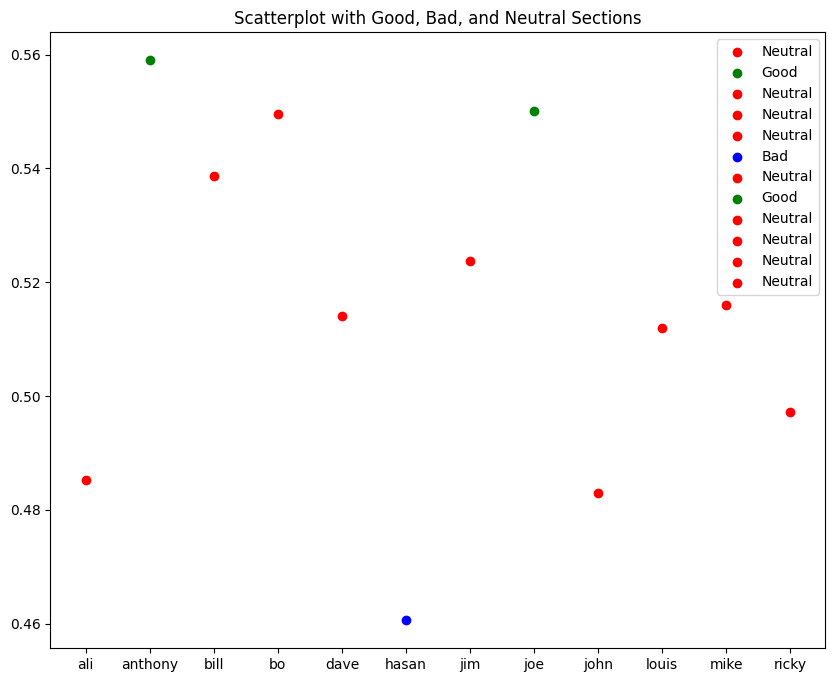

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# set threshold values
good_threshold = 0.55
bad_threshold = 0.48

# create empty lists to store the points for each section
good_points = []
bad_points = []
neutral_points = []

# loop through each data point and add it to the appropriate section list
for i in range(len(subjectivity_average)):
    if subjectivity_average[i] > good_threshold:
        good_points.append([subjectivity_average[i],data.index[i]])
        plt.scatter(data.index[i],subjectivity_average[i],color='green',label='Good')
    elif subjectivity_average[i] < bad_threshold:
        bad_points.append([subjectivity_average[i],data.index[i]])
        plt.scatter(data.index[i],subjectivity_average[i],color='blue',label='Bad')
    else:
        neutral_points.append([subjectivity_average[i],data.index[i]])
        plt.scatter(data.index[i],subjectivity_average[i],color='Red',label='Neutral')

# convert the lists to arrays for plotting
good_points = np.array(good_points)
bad_points = np.array(bad_points)
neutral_points = np.array(neutral_points)
list_all=[good_points,bad_points,neutral_points]

color_list=['green','red','blue']
# plot the data points in each section with different colors
# plt.scatter(good_points[:,1],good_points[:,0], color='green', label='Good')
# plt.scatter(bad_points[:,1], bad_points[:,0],  color='red', label='Bad')
# plt.scatter(neutral_points[:,1],neutral_points[:,0], color='blue', label='Neutral')
# for i in enumerate(list_all):
#     plt.scatter(list_all[i[:,1]],list_all[i[:,0]],color=color_list[i])

# add legend and title
plt.legend()
plt.title('Scatterplot with Good, Bad, and Neutral Sections')

# show the plot
plt.show()
# neutral_points



Question2 

In [22]:
import numpy as np
import math

def split_text(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [23]:
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.055237,0.558976
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002690,0.513958
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.056665,0.515796


In [24]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
# list_pieces

In [25]:
len(list_pieces)

12

In [26]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

20

In [27]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.18230030721966203,
  0.0335034013605442,
  0.09856398809523811,
  0.02090643274853801,
  0.11037581699346405,
  0.07853800611153554,
  0.039282694962042786,
  0.13052455357142856,
  0.018840579710144918,
  -0.03669387755102041,
  0.03333474251443002,
  0.1858715503246753,
  0.08565315315315315,
  0.03374793099057805,
  0.0769073220686124,
  0.1,
  0.04222810111699003,
  0.015192550505050527,
  0.024843358395989994,
  0.12490079365079367],
 [0.2678294552669553,
  -0.0016941391941391866,
  -0.033207792207792214,
  -0.08264652014652014,
  -0.1334353741496599,
  0.05546957671957671,
  0.13125000000000003,
  -0.05312805474095798,
  0.11977124183006535,
  0.2065182436611008,
  0.008928571428571414,
  0.17289819376026275,
  0.178125,
  0.029642857142857137,
  0.08748677248677247,
  0.15242272347535502,
  -0.20135438233264324,
  0.0755585812037425,
  0.01940836940836938,
  0.14585738335738338],
 [0.01614895152129194,
  -0.0847041847041847,
  -0.01004088504088504,
  0.03156325156325156,
  -

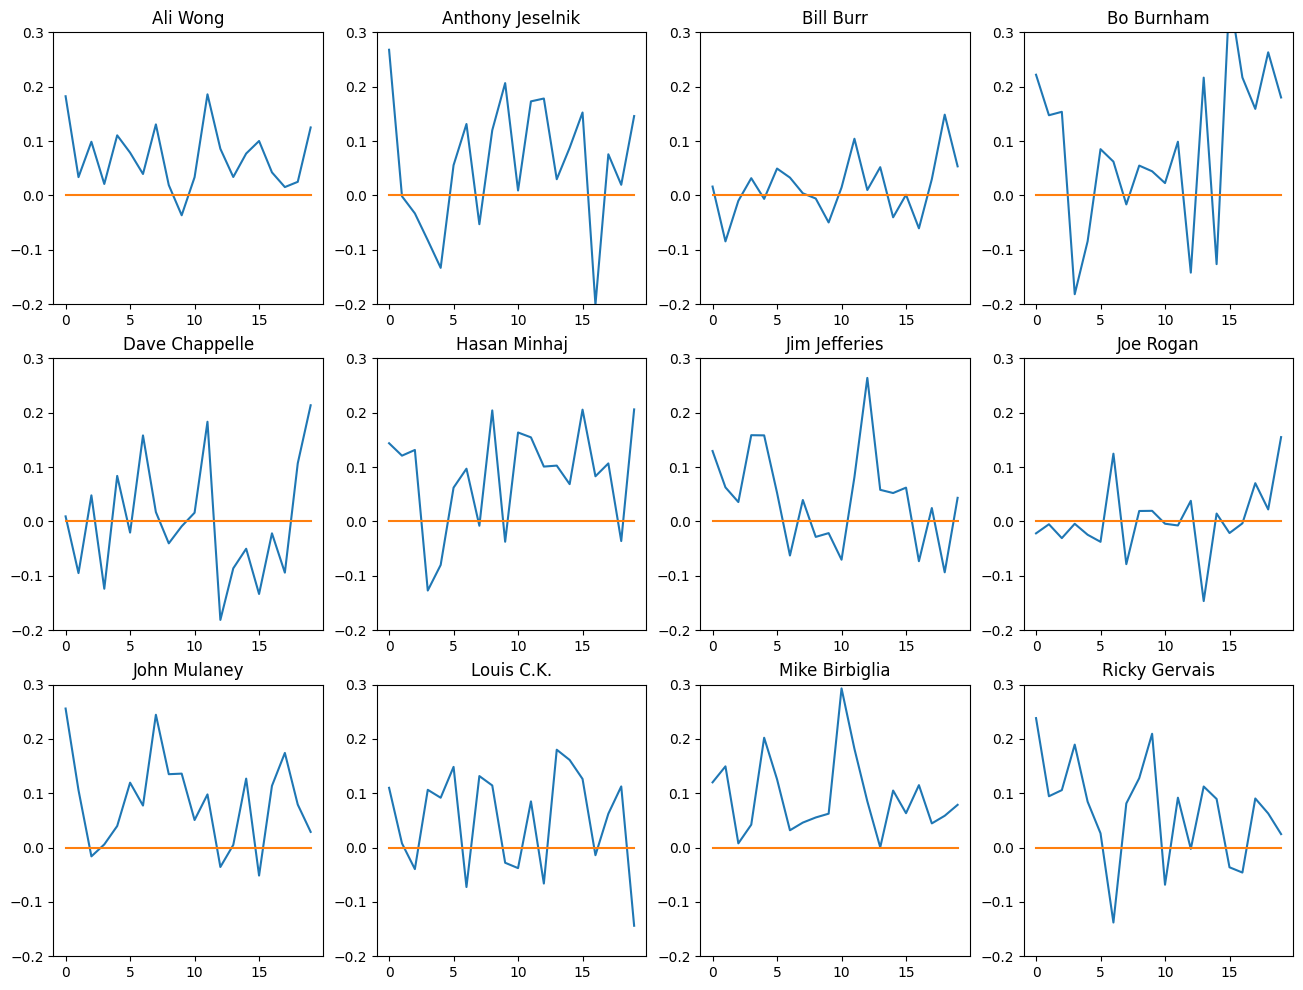

In [28]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,20), np.zeros(20))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)

In [29]:
polarity_average=[]
for p in polarity_transcript:
    average=sum(p)/len(p)
    polarity_average.append(average)
polarity_average

[0.06994107029709257,
 0.05728503534846498,
 0.014400344472252066,
 0.0871661634325304,
 -0.0009347388038191782,
 0.08320863060450791,
 0.043708546199340816,
 0.003913944977770085,
 0.08458133762031787,
 0.05176095910707558,
 0.09335896889697096,
 0.066861049707623]

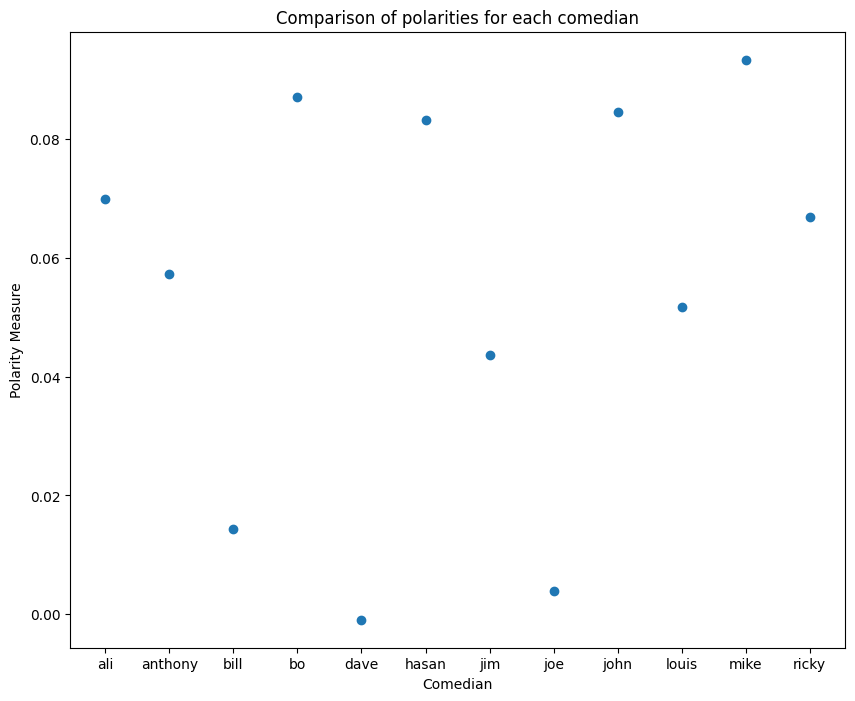

In [37]:
# fig,ax=plt.subplot()
plt.rcParams['figure.figsize'] = [10, 8]
plt.scatter(data.index,polarity_average)
plt.xlabel('Comedian')
plt.ylabel('Polarity Measure')
plt.title('Comparison of polarities for each comedian')
plt.show()

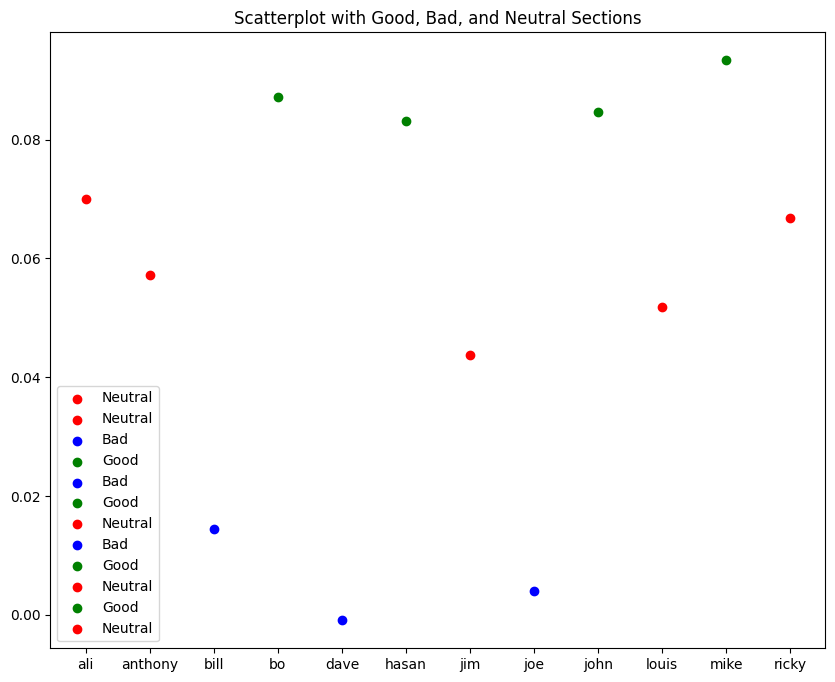

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# set threshold values
good_threshold = 0.08
bad_threshold = 0.04

# create empty lists to store the points for each section
good_points = []
bad_points = []
neutral_points = []

# loop through each data point and add it to the appropriate section list
for i in range(len(polarity_average)):
    if polarity_average[i] > good_threshold:
        good_points.append([polarity_average[i],data.index[i]])
        plt.scatter(data.index[i],polarity_average[i],color='Green',label='Good')
    elif polarity_average[i] < bad_threshold:
        bad_points.append([polarity_average[i],data.index[i]])
        plt.scatter(data.index[i],polarity_average[i],color='Blue',label='Bad')
    else:
        neutral_points.append([polarity_average[i],data.index[i]])
        plt.scatter(data.index[i],polarity_average[i],color='Red',label='Neutral')

# convert the lists to arrays for plotting
good_points = np.array(good_points)
bad_points = np.array(bad_points)
neutral_points = np.array(neutral_points)
list_all=[good_points,bad_points,neutral_points]
color_list=['green','red','blue']
# plot the data points in each section with different colors
# plt.scatter(good_points[:,1],good_points[:,0], color='green', label='Good')
# plt.scatter(bad_points[:,1], bad_points[:,0],  color='red', label='Bad')
# plt.scatter(neutral_points[:,1],neutral_points[:,0], color='blue', label='Neutral')
# for i in enumerate(list_all):
#     plt.scatter(list_all[i[:,1]],list_all[i[:,0]],color=color_list[i])

# add legend and title
plt.legend()
plt.title('Scatterplot with Good, Bad, and Neutral Sections')

# show the plot
plt.show()
# neutral_points



In [31]:
#calculate subjectivity of each piece of text
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)
    
subjectivity_transcript

[[0.6480798771121351,
  0.4924319727891157,
  0.42598586309523817,
  0.43875835421888054,
  0.339624183006536,
  0.41167080468551054,
  0.43813319530710837,
  0.5294642857142858,
  0.4462560386473431,
  0.4451632653061224,
  0.5311219336219336,
  0.49169973544973544,
  0.555855855855856,
  0.43413865546218494,
  0.4212045570916539,
  0.6623333333333334,
  0.5134626690182246,
  0.5013131313131314,
  0.5189223057644109,
  0.44642857142857145],
 [0.5502579365079365,
  0.5854497354497356,
  0.6661659451659452,
  0.5577991452991452,
  0.7138095238095238,
  0.5089153439153439,
  0.673148148148148,
  0.6159172368849787,
  0.4513071895424837,
  0.4609013605442178,
  0.5809113300492613,
  0.5541050903119868,
  0.35416666666666663,
  0.538937728937729,
  0.6595950345950347,
  0.6473057644110276,
  0.5903554175293307,
  0.4890355164548713,
  0.5467712842712843,
  0.44295935545935533],
 [0.6868177980412022,
  0.6179022366522366,
  0.4026274651274651,
  0.4570238095238095,
  0.6096672897809262,
  0

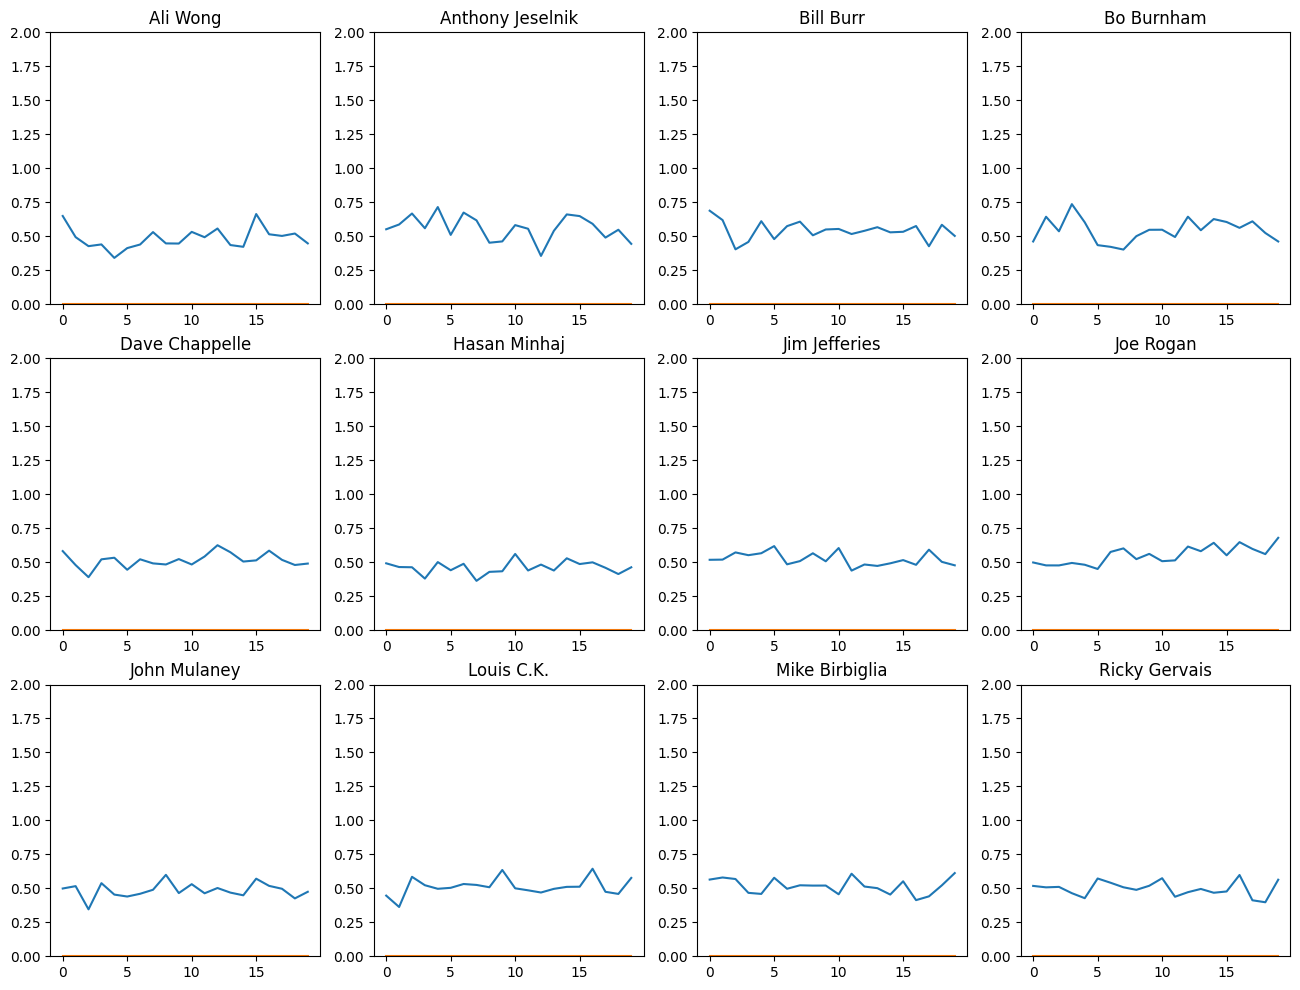

In [32]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,20), np.zeros(20))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=0, ymax=2)

In [33]:
subjectivity_average=[]
for p in subjectivity_transcript:
    average=sum(p)/len(p)
    subjectivity_average.append(average)
subjectivity_average

[0.48460242941106557,
 0.5593907376977002,
 0.5401258469879112,
 0.544227478703866,
 0.5141921263692849,
 0.46127560890442504,
 0.5235087758482392,
 0.551764478931855,
 0.4853263106357139,
 0.5122680041213259,
 0.5174688767036602,
 0.4976190363414384]

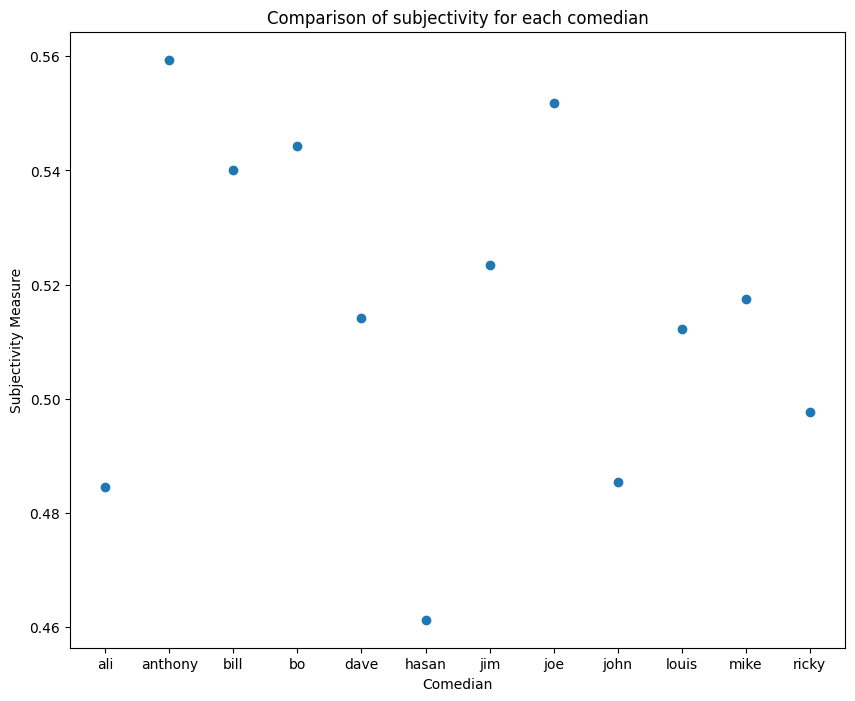

In [34]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.scatter(data.index,subjectivity_average)
plt.xlabel('Comedian')
plt.ylabel('Subjectivity Measure')
plt.title('Comparison of subjectivity for each comedian')
plt.show()

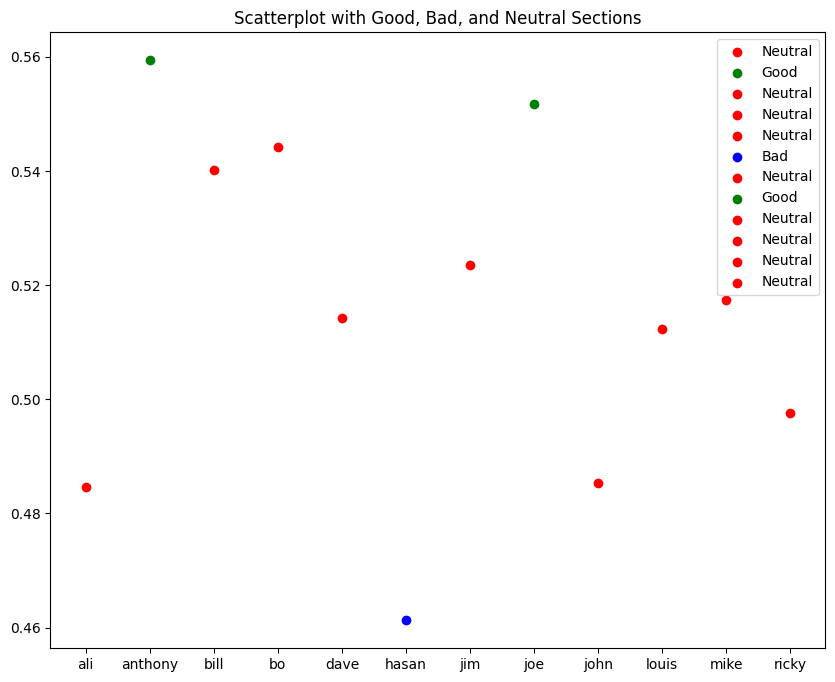

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# set threshold values
good_threshold = 0.55
bad_threshold = 0.48

# create empty lists to store the points for each section
good_points = []
bad_points = []
neutral_points = []

# loop through each data point and add it to the appropriate section list
for i in range(len(subjectivity_average)):
    if subjectivity_average[i] > good_threshold:
        good_points.append([subjectivity_average[i],data.index[i]])
        plt.scatter(data.index[i],subjectivity_average[i],color='Green',label='Good')
    elif subjectivity_average[i] < bad_threshold:
        bad_points.append([subjectivity_average[i],data.index[i]])
        plt.scatter(data.index[i],subjectivity_average[i],color='Blue',label='Bad')
    else:
        neutral_points.append([subjectivity_average[i],data.index[i]])
        plt.scatter(data.index[i],subjectivity_average[i],color='Red',label='Neutral')

# convert the lists to arrays for plotting
good_points = np.array(good_points)
bad_points = np.array(bad_points)
neutral_points = np.array(neutral_points)
list_all=[good_points,bad_points,neutral_points]
color_list=['green','red','blue']
# plot the data points in each section with different colors
# plt.scatter(good_points[:,1],good_points[:,0], color='green', label='Good')
# plt.scatter(bad_points[:,1], bad_points[:,0],  color='red', label='Bad')
# plt.scatter(neutral_points[:,1],neutral_points[:,0], color='blue', label='Neutral')
# for i in enumerate(list_all):
#     plt.scatter(list_all[i[:,1]],list_all[i[:,0]],color=color_list[i])

# add legend and title
plt.legend()
plt.title('Scatterplot with Good, Bad, and Neutral Sections')

# show the plot
plt.show()
# neutral_points

